In [1]:
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [2]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

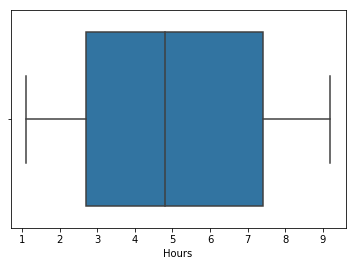

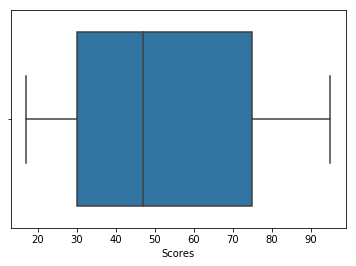

In [7]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


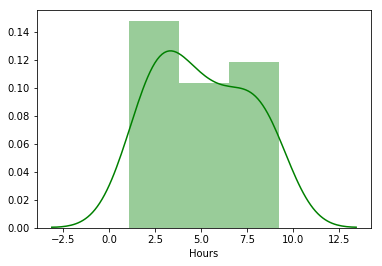

C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


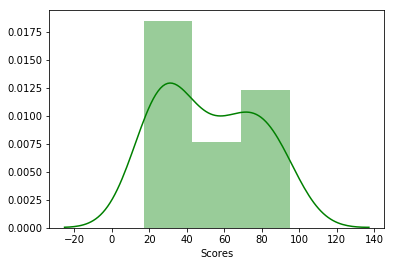

In [9]:
for i in df.columns:
    sns.distplot(df[i], color='g')
    plt.show()

In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
x=df['Hours'].values.reshape(-1, 1)
y=df['Scores'].values.reshape(-1,1)

In [30]:
x[:5], y[:5]

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5]]), array([[21],
        [47],
        [27],
        [75],
        [30]], dtype=int64))

In [16]:
x[:5]

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [20]:
from scipy.stats import pearsonr
corr=pearsonr(df.Hours, df.Scores)
corr

(0.9761906560220887, 9.132624467459352e-17)

Text(0,0.5,'Hours')

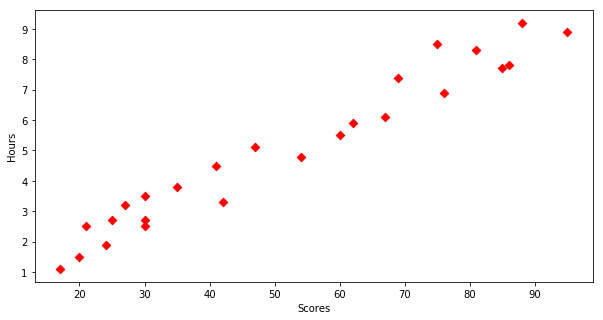

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df.Scores, df.Hours, marker='D', color='r')
plt.xlabel('Scores')
plt.ylabel('Hours')

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)

In [32]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope:
print(model.coef_)

[2.48367341]
[[9.77580339]]


#  Score=b0+b1*Hours

# Scores=2.48367341+9.77580339*Hours



In [36]:
model.predict(x)

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

In [38]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [44]:
y_pred=model.predict(x)
error=y-y_pred
error


array([[ -5.92318188],
       [ -5.3402707 ],
       [ -6.76624426],
       [-10.57800223],
       [ -6.69898527],
       [  2.85262151],
       [ -4.4210646 ],
       [  3.74940795],
       [ -2.62284155],
       [ -3.87834256],
       [  7.24264049],
       [  1.83908659],
       [ -5.47478866],
       [  7.25617541],
       [  3.76294286],
       [  5.51167642],
       [  3.07681812],
       [  2.94230015],
       [  4.88392591],
       [ -5.8246185 ],
       [  1.12165744],
       [  4.59247032],
       [ -4.63172629],
       [  6.0632832 ],
       [  7.26506015]])

In [45]:
#https://stackoverflow.com/questions/56283294/importerror-cannot-import-name-factorial
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2579.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.10e-26
Time:                        12:13:30   Log-Likelihood:                -78.026
No. Observations:                  25   AIC:                             158.1
Df Residuals:                      24   BIC:                             159.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.1743      0.200     50.787      0.0

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 4.972805319866375
Mean Squared Error: 28.88273050924546
Root Mean Squared Error: 5.374265578592619


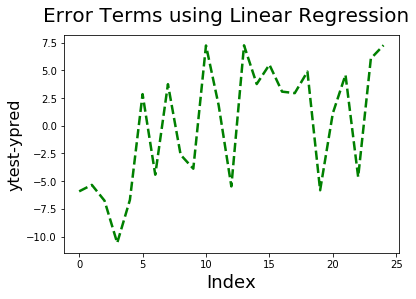

In [53]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y-y_pred, color="green", linewi dth=2.5, linestyle="--")
fig.suptitle('Error Terms using Linear Regression', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()